<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

np.random.seed(42)

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

### Краем глаза посмотрим на основные сводные таблицы по нашим данным (так называемый, первичный анализ данных...)

In [4]:
data.sample(n=10)  # слуайные объекты из тренировочной выборки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0
2348,1,74.40,74.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2280,6,50.80,288.05,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
733,21,68.65,1493.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [5]:
data.describe()  # основные статистики по числовым признакам

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [6]:
data.describe(include=('object'))  # оснонвые статистики по категориальным признакам

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,20.2,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [7]:
data.isna().sum() / data.shape[0] * 100  # смотрим на пропуски в процентах

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

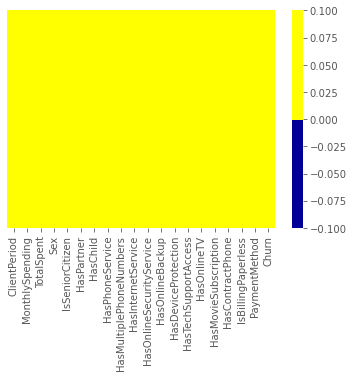

In [8]:
# отрисуем график пропусков (синий - пропуск)
colours = ['#000099', '#ffff00'] 
sns.heatmap(
    data.isnull(),
    cmap=sns.color_palette(colours),
    yticklabels=False,
);

Видно, что в данных пропусков не наблюдается. В дальнейшем, проанализируем их еще на предмет выбросов какими-нибудь критериями.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как можно заметить, достаточно большое число данных у нас относится к категорильным, что, конечно, затруднит работу алгоритмов. Но ничего, это частично поправимо!

In [10]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

bin_cols = [  # добавим еще лист бинарных и тернарных признаков, но обзовем его бинарарным 
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
]

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Сперва узнаем, какое вообще "распределение" целевой переменной

	0.74 - rate of 0
    	0.26 - rate of 1


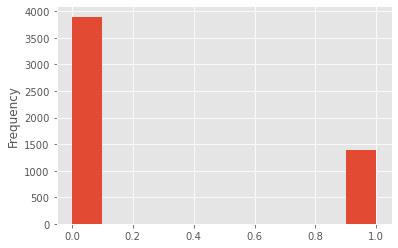

In [11]:
types, frequency = np.unique(data['Churn'], return_counts=True)
print(f"\t{round(frequency[0] / data['Churn'].shape[0], 2)} - rate of {types[0]}\n\
    \t{round(frequency[1] / data['Churn'].shape[0], 2)} - rate of {types[1]}")

data['Churn'].plot(kind='hist');

Видно, что выборка несбалансированная, так как объекты с целевой переменной `1` составляют лишь примерно четверть всех данных, но ресэмплить я все-таки не буду, попробую использовать другие методы просто более аккуратно. Например, не будем оценивать качество модели по `accuracy`

Также стоит обратить внимание, что минимально допустимая точность на хорошем алгоритме должна быть минимум выше, чем `0.74`, так как такого качества возможно достичь даже "константным" алгоритмом с ответом `0`

### Посмотрим теперь на распределение числовых признаков

#### Но сперва...

Стоит обратить внимание, что почему-то `TotalSpent` имеет тип `object`, хотя и является числовым признаком. Также `IsSeniorCitizen` является чилсловым, хотя по сути это категориальный. Исправим же это недоразумение!

В процессе кастования `TotalSpent` к `float64` выясняется, что  появились пропуски. Заполним их средним.

In [12]:
def prepare_data(dataset):
    new = dataset.copy()
    
    new['TotalSpent'] = pd.to_numeric(new['TotalSpent'], errors='coerce')
    new['IsSeniorCitizen'] = new['IsSeniorCitizen'].astype('object')
    new['TotalSpent'] = new['TotalSpent'].fillna(new['TotalSpent'].mean())
    
    assert data.isnull().sum().sum() == 0
    return new

In [13]:
data = prepare_data(data)

In [14]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [15]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen              object
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

#### вернемся теперь к нашим числовым признакам

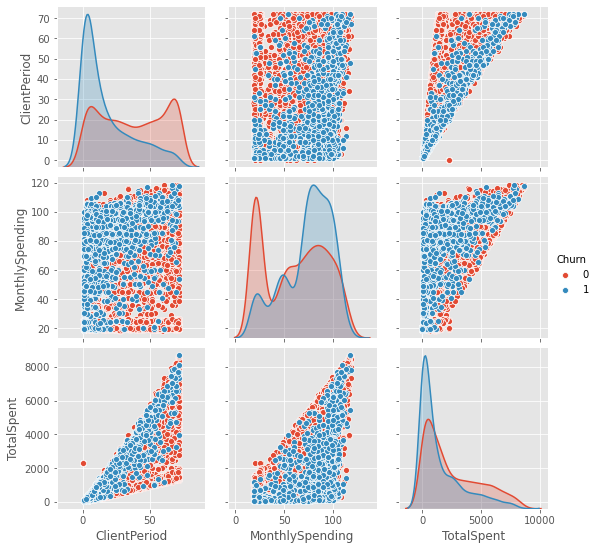

In [16]:
sns.pairplot(data[num_cols + [target_col]], hue='Churn');

почти на каждом scatterplot заметно, что целевая метка хорошо разделяется какой-нибудь гиперплоскостью (в данном случае по признакам просто прямой). Таким образом, скорее всего линейный классификатор должен быть хорошей моделью. В принципе деревья решений (хоть на бэггинге, хоть на бустинге) тоже должны быть неплохим вариантом, так как в силу разделимости целевой метки, должны быть не особо глубокими

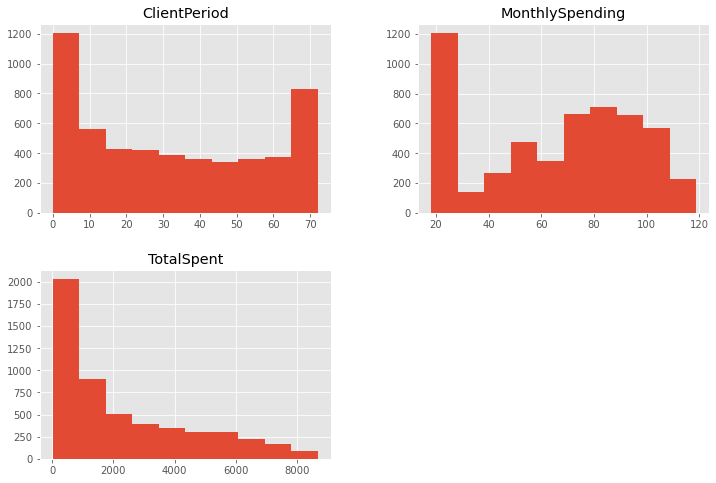

In [17]:
data[num_cols].hist(figsize=(12, 8));

То же самое, но в логарифмической шкале:

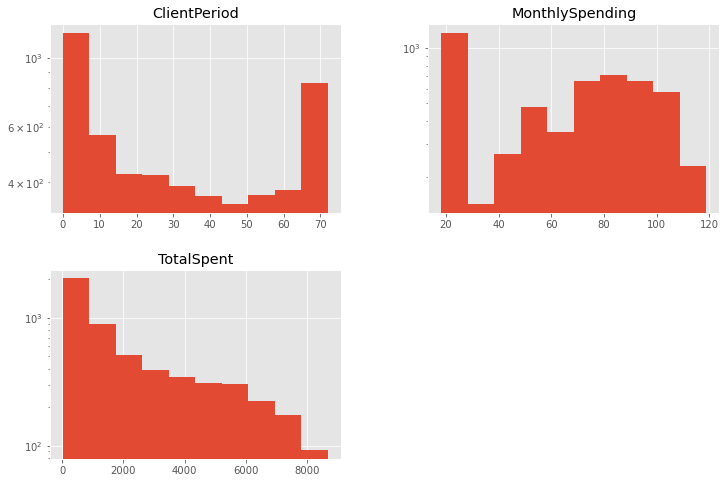

In [18]:
data[num_cols].hist(figsize=(12, 8), log=True);

Видно, что в целом нельзя говорить о тяжелых хвостах в распределениях числовых признаков, но, тем не менее не побрезгуем затем проналазировать данные на предмет нахождения их в *окрестности трех $\sigma$* среднего

In [19]:
def detect_outlier_std(data, feature, threshold=3):
    mean = data[feature].mean()
    sigma = data[feature].std()
    
    upper_bound = mean + threshold * sigma
    lower_bound = mean - threshold * sigma
    
    outliers = pd.concat([data[data[feature] > upper_bound], data[data[feature] < lower_bound]], axis=0)
    
    return outliers

In [20]:
print("Согласно правилу трех сигм:\n")
for feature in num_cols:
    print(f"количество выбросов для признака {feature}: {detect_outlier_std(data, feature).shape[0]}")

Согласно правилу трех сигм:

количество выбросов для признака ClientPeriod: 0
количество выбросов для признака MonthlySpending: 0
количество выбросов для признака TotalSpent: 0


Как можно заметить, все числовые признаки лежат в окрестности трех сигм (трех стандартных отклонений). Аналогично, проделаем процедуру с интерквантильным размахом:

In [21]:
def detect_outlier_iqr(data, feature, threshold=1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    
    upper_bound = data[feature].quantile(0.75) + (IQR * threshold)
    lower_bound = data[feature].quantile(0.25) - (IQR * threshold)
    
    outliers = pd.concat([data[data[feature] > upper_bound], data[data[feature] < lower_bound]], axis=0)
    
    return outliers

In [22]:
print(f"Согласно правилу 1.5 интерквантильных размахов (1.5*IQR):\n")
for feature in num_cols:
    print(f"количество выбросов для признака {feature}: {detect_outlier_iqr(data, feature).shape[0]}")

Согласно правилу 1.5 интерквантильных размахов (1.5*IQR):

количество выбросов для признака ClientPeriod: 0
количество выбросов для признака MonthlySpending: 0
количество выбросов для признака TotalSpent: 0


C чистой совестью заявляем, что явных выбросов в данных **НЕТ**

Посмотрим еще на ящики с усами для числовых признаков относительно разных категориальных переменных

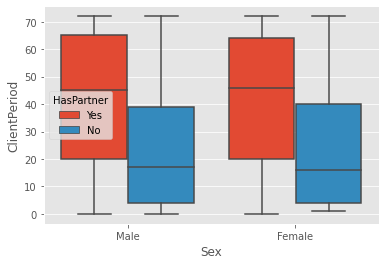

In [23]:
sns.boxplot(x='Sex', y='ClientPeriod', data=data, hue='HasPartner', saturation=1);

Например, здесь видно, что если у человека есть партнер (вне зависимости от пола), то `ClientPeriod` больше, чем у людей без партнера

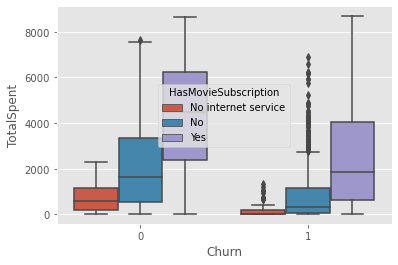

In [24]:
sns.boxplot(x='Churn', y='TotalSpent', hue='HasMovieSubscription',data=data);

Из этого боксплота ничего особо интересного нет, так как он лишь говорит о том, что люди с подпиской тратят больше, чем люди без интернета или без подписки. Но пусть он все равно тут будет :)

Также изобразим, как признаки связаны с оттоком

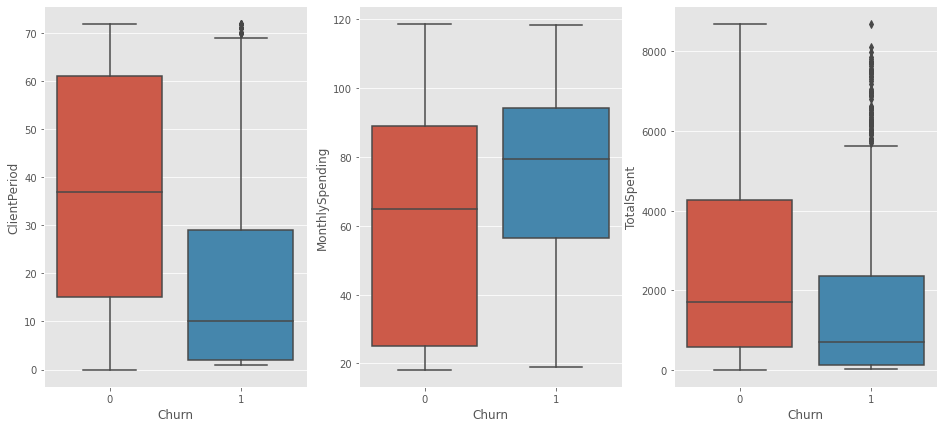

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 7))

for idx, feat in  enumerate(num_cols):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx])
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feat);

видно, что люди, потратившие больше, реже уходят, но также достаточно много выбросов, в смысле того, что клиент потратил много, но все равно ушел, но что любопытно, если обратить внимание на месячные расходы, то выясняется, что медианное значение трат, тех кто ушел от нас *выше*, чем у тех, кто остался. Из слабого описания задачи, честно говоря, пока непонятно с чем это связано.

Теперь поизучаем матрицу корреляций:

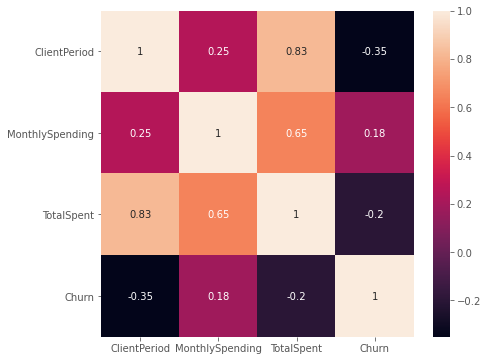

In [26]:
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(
    data[num_cols + [target_col]].corr(),
    annot=True,
);

Как видно из матрицы, `TotalSpent` и `ClientPeriod` довольно прилично коррелируют между собой. Тем не менее, убирать я не буду один из этих столбцов, так как коррелируют они не очень сильно. Заметим также, что `TotalSpent` и `MonthlySpending` имеют некоторую линейную зависимость, вероятно, это из-за того, что оба эти признака суть признаки про траты

### Перейдем к категориальным

изобразим для бинарных (или почти) признаков `countplot` относительно целевой переменной

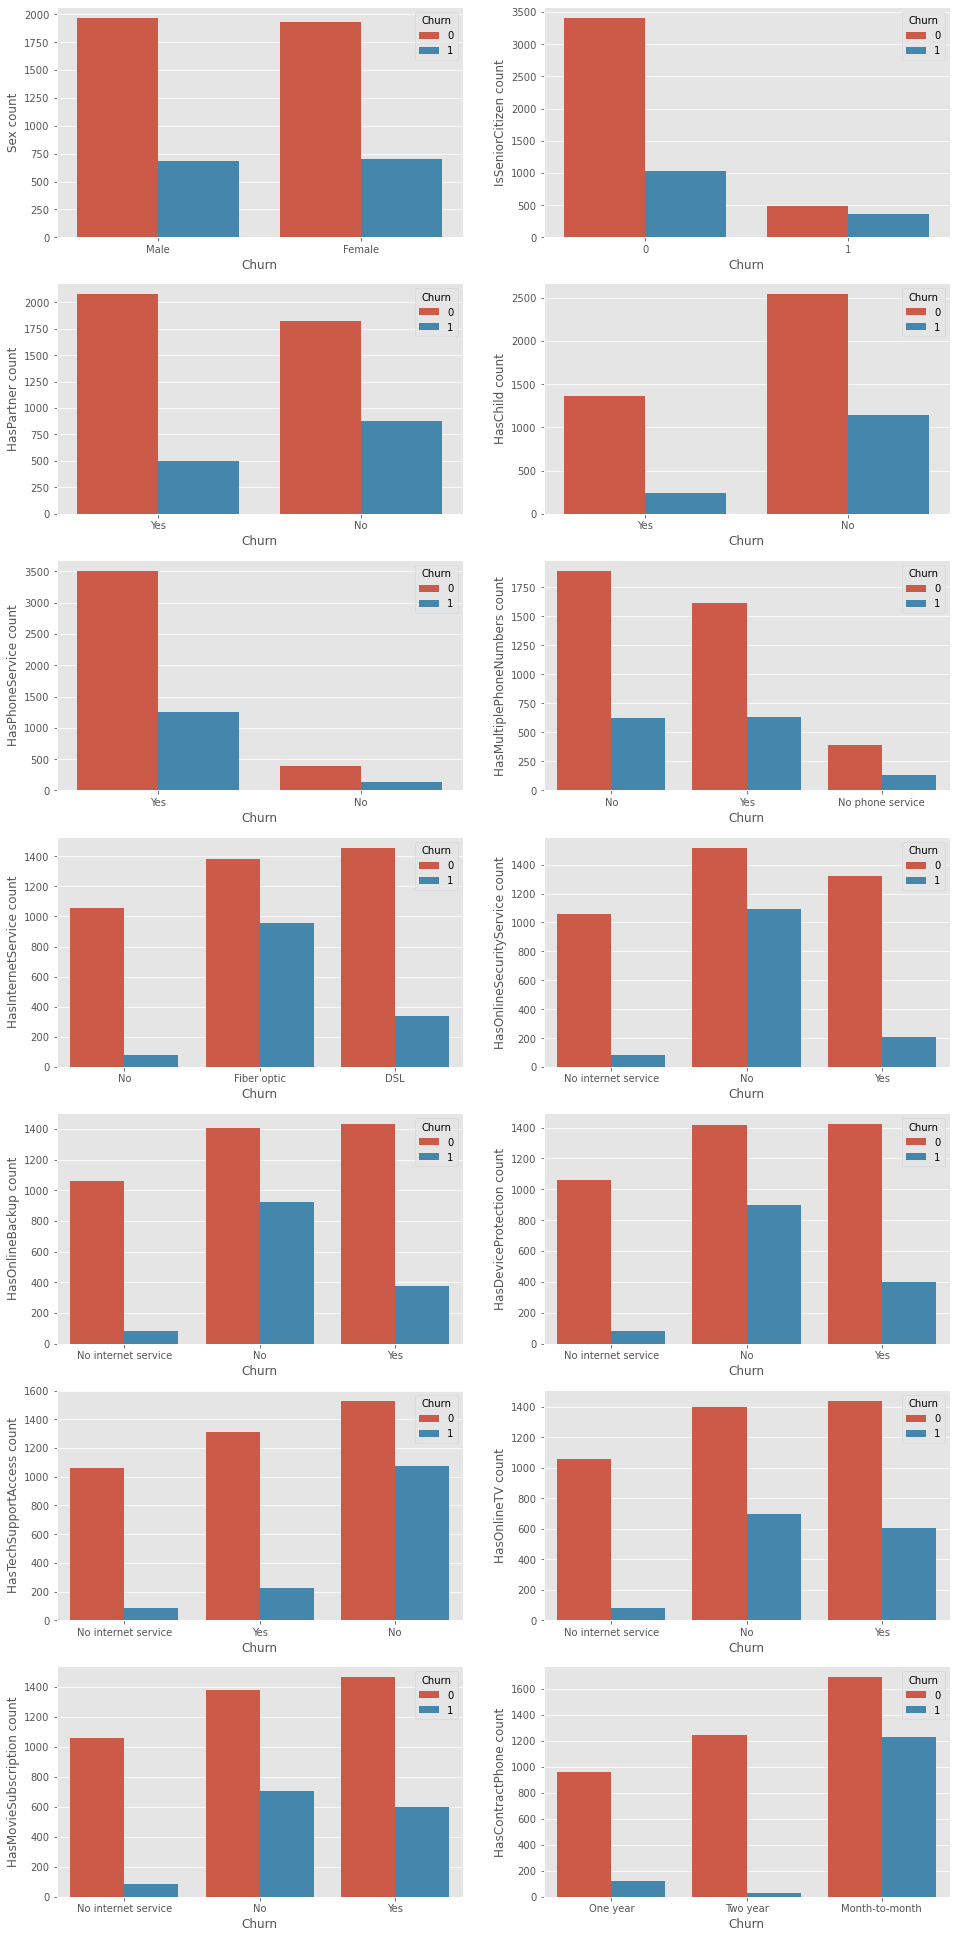

In [27]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 14))
plt.subplots_adjust(top=2)

for ax, binary_feature in zip(axes.flat, bin_cols):
    sns.countplot(x=binary_feature, hue='Churn', data=data, ax=ax)
    ax.set_xlabel('Churn')
    ax.set_ylabel(f'{binary_feature} count');

В целом видно, что среди тех, у кого нет интернет сервисов, довольно мало покидают.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

А вроде бы их и нет...

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

### Для начала разберемся с категориальными признаками

Проведем операцию one-hot кодирования

In [29]:
dummies = pd.get_dummies(data[cat_cols])

X = pd.concat([data[num_cols], dummies], axis=1)
y = data[target_col]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


### Теперь отнормируем числовые признаки

Сперва разобьем данные на train / test, чтобы не произошло вдруг внезапной утечки при нормировке по всему датасету

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33)

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Данные готовы к бою! \*Логистическая регрессия выходит в октагон...\*

In [32]:
clf_vanilla = LogisticRegressionCV(
    Cs=(100, 10, 1, 0.1, 0.01, 0.001),
    cv=5,
    scoring='roc_auc',
    random_state=42,
    refit=True,
)

clf_vanilla.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=(100, 10, 1, 0.1, 0.01, 0.001), cv=5, random_state=42,
                     scoring='roc_auc')

In [33]:
y_train_prediction = clf_vanilla.predict_proba(X_train_scaled)[:, 1]

print(f"ROC-AUC on the train data: {roc_auc_score(y_train, y_train_prediction)}")

ROC-AUC on the train data: 0.8477683761251537


In [34]:
y_test_prediction = clf_vanilla.predict_proba(X_test_scaled)[:, 1]

print(f"ROC-AUC on the test data: {roc_auc_score(y_test, y_test_prediction)}")

ROC-AUC on the test data: 0.8493534482758621


In [35]:
print(f"the best coef of regulazation: {float(clf_vanilla.C_)}")

the best coef of regulazation: 10.0


### Реализуем также более трудоемкий вариант

In [36]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ]
)

cat_tranformer = Pipeline(
    steps=[
        ('to_one_hot', OneHotEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_tranformer, cat_cols)
    ]
)

clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('to_one_hot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression())])

Заново разобьем сырые данные на train/test, чтобы убедиться что pipeline работает корректно

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2)

Теперь создаем `GridSearch`

In [38]:
param_grid = {
    "classifier__C": (100, 10, 1, 0.1, 0.01, 0.001),
    "classifier__penalty": ["l1","l2"],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('to_one_hot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'Has...PhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': (100, 10, 1, 0.1, 0.01, 0.001),
                         'classifier__penalty': ['l1', 'l2']})

In [39]:
print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.815


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [40]:
# !pip install catboost

In [67]:
from catboost import CatBoostClassifier, Pool

In [88]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
cat_indx = data.columns.get_indexer(cat_cols)

In [89]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [44]:
# grid_clf = CatBoostClassifier(verbose=False)

# params = {
#    "eval_metric": ['AUC'],
#    "use_best_model": [True],
#    "iterations": [ 800, 1000, 1200],
#   "learning_rate": [0.02, 0.04,],
#    "cat_features": [cat_indx],
#    "depth": [6, 8, 10],
#    "loss_function": ['Logloss', "CrossEntropy"],
#    'random_seed': [42],
#}

# catboost_grid = RandomizedSearchCV(estimator=grid_clf, param_distributions=params, cv=5)

In [45]:
catboost_clf = CatBoostClassifier()

params = {
    'iterations': [1000],
    'depth': [6, 8, 10],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'random_seed': [42],
    'verbose': [False],
    'cat_features': [cat_indx],
}

scorer = make_scorer(roc_auc_score, needs_proba=True)
catboost_grid = GridSearchCV(estimator=catboost_clf, param_grid=params, scoring=scorer, cv=5)

In [46]:
catboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ffdf8898ac0>,
             param_grid={'cat_features': [array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])],
                         'depth': [6, 8, 10], 'iterations': [1000],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [42], 'verbose': [False]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [90]:
best_param = catboost_grid.best_params_
best_param

{'cat_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
 'depth': 6,
 'iterations': 1000,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': False}

In [93]:
final_catboost_clf = CatBoostClassifier(**best_param,
                                        eval_metric='AUC',
                                        use_best_model=True,
                                        learning_rate=0.0499,
                                       )
train_pool =  Pool(X_train, y_train, cat_features=cat_indx)
final_catboost_clf.fit(train_pool, eval_set=(X_test, y_test));

In [94]:
train_pred = final_catboost_clf.predict_proba(X_train)[:, 1]
test_pred = final_catboost_clf.predict_proba(X_test)[:, 1]


print(f"ROC-AUC on the train data: {roc_auc_score(y_train, train_pred)}")
print(f"ROC-AUC on the test data: {roc_auc_score(y_test, test_pred)}")

ROC-AUC on the train data: 0.8638055730967424
ROC-AUC on the test data: 0.8385149879931701


# Предсказания

In [95]:
best_model = final_catboost_clf
print(f"preferable number of tree : {best_model.tree_count_}")

preferable number of tree : 77


In [96]:
X_test = pd.read_csv('./test.csv')
X_test = prepare_data(X_test)

In [97]:
X_test.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [98]:
submission = pd.read_csv('./submission.csv')
predicted =  best_model.predict_proba(X_test)[:, 1]
submission['Churn'] =  predicted

submission.to_csv('./my_submission.csv', index=False)

In [99]:
submission

,Id,Churn
0,0,0.042412
1,1,0.566898
2,2,0.673730
3,3,0.019198
4,4,0.009687
...,...,...
1756,1756,0.151426
1757,1757,0.016941
1758,1758,0.814284
1759,1759,0.552620


## Полученный в итоге максимальный скор: 0.85279
## В соревновании ищите меня как `Кирилл Власенков`


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.